#                       Mexico's COVID19 Data description and Analisys


<img align="center" src="https://i.imgur.com/ywPyXHY.png">


<a href = 'https://coronavirus.gob.mx/datos/#DownZCSV'>
    <img align="center" src="https://i.imgur.com/EgVX1r8.png">
</a>

# Loading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
# Pacient data contains detail information about every subject in the database, age, sex, and some illness history
patient_data = pd.read_csv('200523COVID19MEXICO.csv', encoding='ANSI')
# Confirmed is the number of comfirmed cases each day
confirmed = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200523.csv', encoding='ANSI')
# Suspicious is the number of suspicious cases each day
suspicious = pd.read_csv('Casos_Diarios_Estado_Nacional_Sospechosos_20200523.csv', encoding='ANSI')
# Negatives is the number of negative test cases each day
negatives = pd.read_csv('Casos_Diarios_Estado_Nacional_Negativos_20200523.csv', encoding='ANSI')
# Deaths is the number of deceased cases each day
deaths = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20200523.csv', encoding='ANSI')
# State_names is an array with the names of each state
state_names = deaths.nombre.values

# 1.- Frequency of cases

## Confirmed, Deaths, Negative and Suspicious Data

In [3]:
# Confirmed, negative, deaths and suspicious dataFrames have the same structure.
confirmed.head()

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,...,13-05-2020,14-05-2020,15-05-2020,16-05-2020,17-05-2020,18-05-2020,19-05-2020,20-05-2020,21-05-2020,22-05-2020
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,13,21,27,3,7,34,19,22,11,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,101,90,91,50,50,110,57,19,6,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,6,8,5,9,2,7,12,4,0,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,15,10,10,12,13,15,15,9,0,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,65,67,76,31,30,77,49,33,1,0


### State Names

In [4]:
# State names for confirmed, suspicious, negative and deaths data, patient_date states names are a little different
state_names

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'DISTRITO FEDERAL', 'COAHUILA',
       'COLIMA', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO',
       'JALISCO', 'MEXICO', 'MICHOACAN', 'MORELOS', 'NAYARIT',
       'NUEVO LEON', 'OAXACA', 'PUEBLA', 'QUERETARO', 'QUINTANA ROO',
       'SAN LUIS POTOSI', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS',
       'TLAXCALA', 'VERACRUZ', 'YUCATAN', 'ZACATECAS', 'Nacional'],
      dtype=object)

### Functions to get discrete or cummulative data from any particular state

In [6]:
# Functions to get formated data from a particular state
# Both functions take a name and a database. (name='state_name',raw_data=database)
# works only for the confirmed, suspicious, negative and deaths databases
# patient_data is different.
from data_helpers import get_discrete, get_cummulative

In [6]:
discrete_mexico_city_deaths = get_discrete('DISTRITO FEDERAL',deaths)
cummulative_mexico_city_deaths = get_cummulative('DISTRITO FEDERAL',deaths)

### get_discrete() gives an array for each day incidents

In [7]:
discrete_mexico_city_deaths

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 3, 1, 2, 4, 6, 5, 5,
       7, 4, 4, 16, 10, 6, 17, 22, 21, 9, 13, 23, 21, 22, 16, 21, 27, 24,
       34, 24, 25, 36, 39, 41, 40, 33, 45, 60, 49, 39, 52, 43, 53, 50, 40,
       46, 36, 48, 44, 41, 47, 49, 41, 42, 27, 47, 37, 15, 17, 1],
      dtype=object)

### get_cummulative() gives a list of the cummulative record by day

In [8]:
cummulative_mexico_city_deaths[28:50]

[0, 0, 0, 0, 1, 2, 2, 3, 6, 9, 10, 12, 16, 22, 27, 32, 39, 43, 47, 63, 73, 79]


### Function to plot discrete data

In [7]:
# plot_discrete(data, names = None, colors=None, title=None, trim=None)
# Data should be an array of tuples: [('State name', database),('State name2', database)]
# database should be: confirmed, suspicious, negatives or deaths.
# If names = None, then each 'State name' will be use
# You can choose the colors of each state by passing an array: ['r','b','y'...]
# Or passing a string like: 'rbgy' if each of the colors are one letter in the matplotlib documentation.
# If colors = None, colors will be a cycle from the default: 'b', 'g', 'r', 'c', 'm' and 'y'
# Trim is the number of days to skip at the beginning, since the first month or so are usually empty.

def plot_discrete(data,names = None, colors=None, title=None, trim=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,6)
    
    plot_data = []
    if names == None:
        labels = []
    else:
        labels = names
    
    for state in data:
        plot_data.append(get_discrete(state[0],state[1]))
        if names == None:
            labels.append(state[0])
    
    max_len = max([len(x) for x in plot_data])
    
    last_day = confirmed.columns[-1]
    
    index = pd.date_range(start=pd.to_datetime(confirmed.columns[-1]) - timedelta(days=max_len), periods=max_len, freq='D')
    
    if colors == None:
            colors ='bgrcmy'* int(np.ceil(len(plot_data)/6))
       
    for ind, i in enumerate(plot_data):
        if len(i) < max_len:
            i = [0]*(max_len-len(i))+list(i)
        
        plt.bar(index,i, label = labels[ind],color = colors[ind],alpha = 0.5)
       
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.xticks(rotation=90)
    if trim:
        plt.xlim(index[0] + timedelta(days=trim),)
    plt.show()

## National discrete data

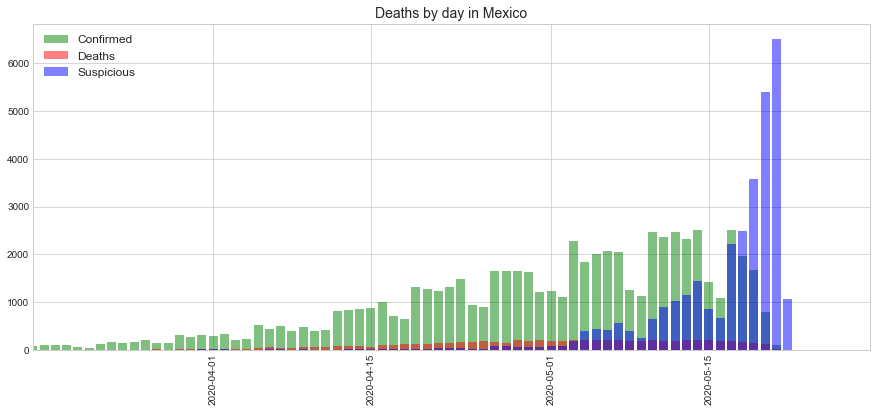

In [8]:
plot_discrete(data = [('Nacional',confirmed),
                     ('Nacional',deaths),
                     ('Nacional',suspicious)],
              names =['Confirmed','Deaths','Suspicious'],
              colors=['g','r','b'],
              title='Deaths by day in Mexico',
              trim=70)

## Metropolitan area, discrete, death and confirmed

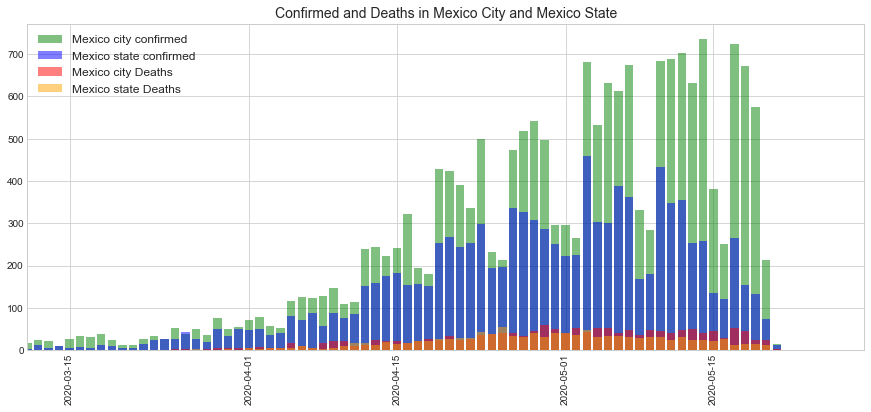

In [9]:
plot_discrete([('DISTRITO FEDERAL',confirmed),
                  ('MEXICO',confirmed),
                  ('DISTRITO FEDERAL',deaths),
                  ('MEXICO',deaths)],
                  names =['Mexico city confirmed','Mexico state confirmed',
                          'Mexico city Deaths','Mexico state Deaths'],
                  colors=['g','b','r','orange'],
                  title='Confirmed and Deaths in Mexico City and Mexico State',
                  trim=65)

### Function to plot cummulative data

In [10]:
# Same Instructions of the discrete data apply here

def plot_cummulative(data, names = None, colors = None, title = None, trim=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,7)
    
    plot_data = []
    if names == None:
        labels = []
    else:
        labels = names
    
    for state in data:
        plot_data.append(get_cummulative(state[0],state[1]))
        if names == None:
            labels.append(state[0])
    
    max_len = max([len(x) for x in plot_data])
    last_day = confirmed.columns[-1]
    
    index = pd.date_range(start=pd.to_datetime(deaths.columns[-1]) - timedelta(days=max_len), periods=max_len, freq='D', closed = None)
    
    if not colors:
        colors ='bgrcmy'* int(np.ceil(len(plot_data)/6))
    
    for ind,i in enumerate(plot_data):
        if len(i) != max_len:
            i = [0]*(max_len-len(i))+i
        
        plt.plot(index,i,label=labels[ind],color=colors[ind])
        plt.scatter(index[-1],i[-1],color=colors[ind])
        plt.text(index[-1], i[-1],str(int(i[-1])) , fontsize=14 ,color=colors[ind])
        plt.fill_between(index, i, color = colors[ind], alpha = 0.4)
               
    plt.xticks(rotation=90,fontsize=13)
    plt.title(title, fontsize=14)
    
    if trim:
        plt.xlim(index[0] + timedelta(days=trim),)
        
    plt.legend(loc='upper left',fontsize=14)
    plt.show()

## National cummulative record for confirmed, suspicious, and deaths

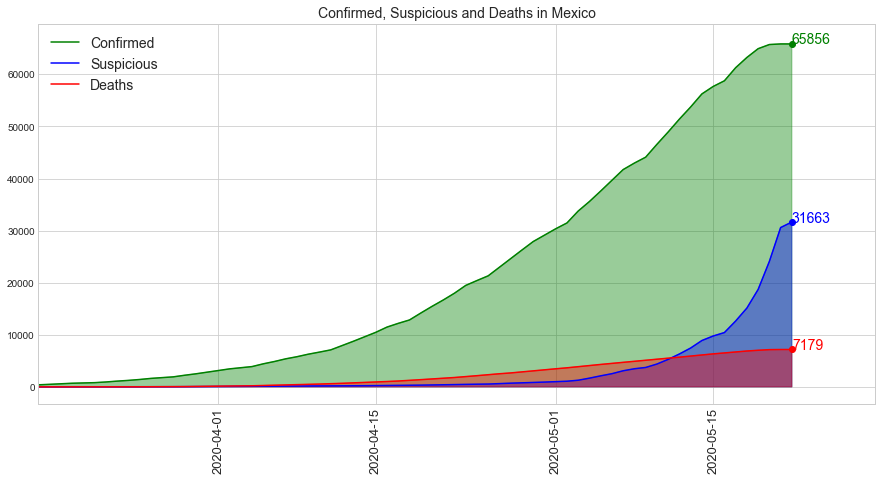

In [11]:
plot_cummulative([('National',confirmed),
                  ('National',suspicious),
                  ('National',deaths)],
                  names =['Confirmed','Suspicious','Deaths'],
                  colors=['g','b','r'],
                  title='Confirmed, Suspicious and Deaths in Mexico',
                  trim=70)

## Metropolitan area cummulative, death and confirmed

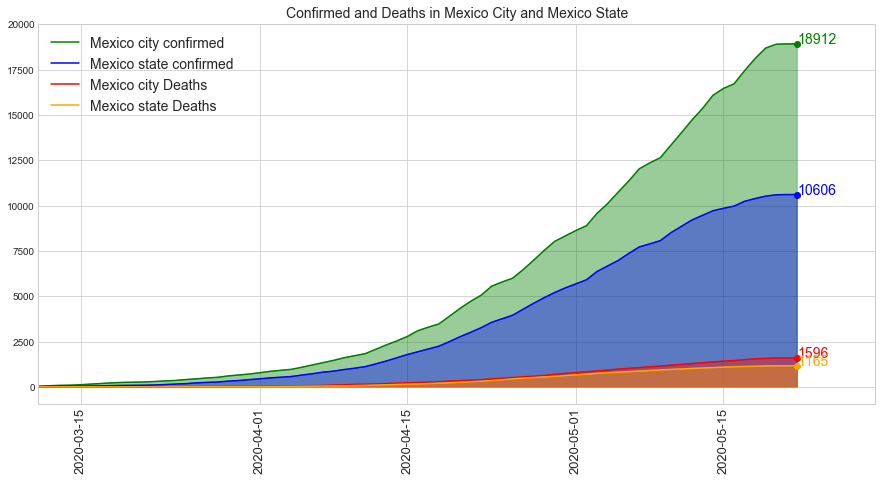

In [14]:
plot_cummulative([('DISTRITO FEDERAL',confirmed),
                  ('MEXICO',confirmed),
                  ('DISTRITO FEDERAL',deaths),
                  ('MEXICO',deaths)],
                  names =['Mexico city confirmed','Mexico state confirmed',
                          'Mexico city Deaths','Mexico state Deaths'],
                  colors=['g','b','r','orange'],
                  title='Confirmed and Deaths in Mexico City and Mexico State',
                  trim=65)

## Ploting all data from max to min.

### Function to get several states sorted from max to min.

In [15]:
from data_helpers import get_max_to_min
# This function returns a list with the state names from max to min incidence and a dictionary with the actual values
# name_array, dictionary = get_max_to_min(raw_data, include_national = False, reverse = False)
# raw_data is the database: confirmed, negatives, suspicious or deaths.
# National data is naturally much more higher that any particular state, by default is ommited
# To include National set the parameter include_national to True
# To return the list from MIN to MAX set reverse to True

### Function to plot the data from get_max_to_min()

In [16]:
# Raw_data is the database of origin: deaths, confirmed, etc...
# N is the number of states that will be plotted, if None is True, then all of them will output
# If the Discrete parameter is False then cummulative data will be plotted
# reverse is set to True the min to max will be plotted

def plot_max_to_min(raw_data,
                    n = None,
                    discrete = True,
                    title = None,
                    colors = None,
                    trim = None,
                    include_national = False,
                    reverse = False):
    
    names = get_max_to_min(raw_data, include_national = include_national, reverse = reverse)[0][:n]
    data = []
    for name in names:
        data.append((name,raw_data))
        
    if discrete:
        
        plot_discrete(data = data,
                      colors = colors,
                      title = title,
                      trim = trim)
    else:
                
        plot_cummulative(data = data,
                         colors = colors,
                         title = title,
                         trim = trim)

## Discrete states from max to min incidence

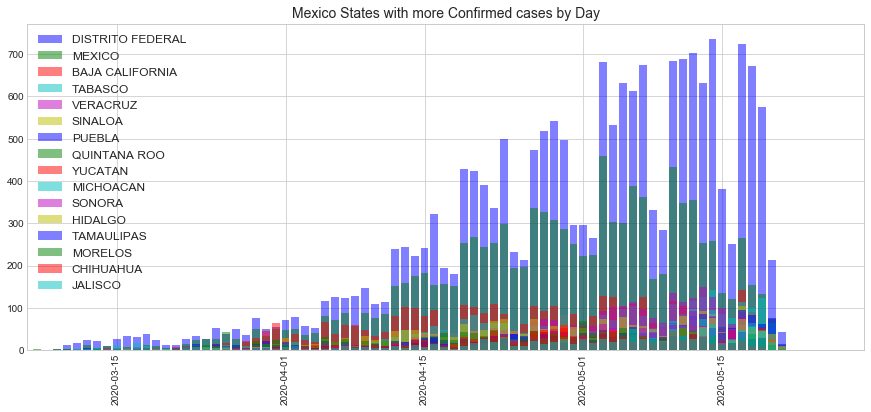

In [17]:
plot_max_to_min(raw_data = confirmed,
                n=16,
                discrete=True,
                title='Mexico States with more Confirmed cases by Day',
                trim=60,
                reverse = False) 

## Cummulative states from max to min incidence

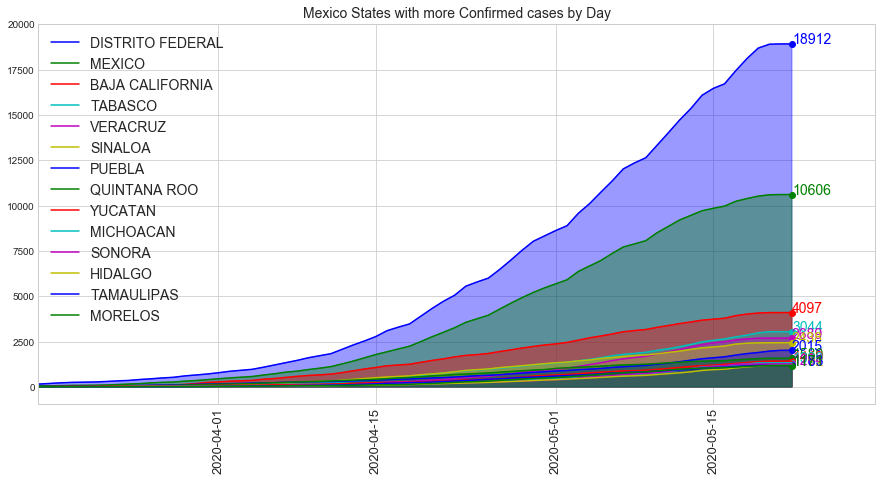

In [20]:
plot_max_to_min(raw_data = confirmed,
                n=14,
                discrete=False,
                title='Mexico States with more Confirmed cases by Day',
                trim=70,
                reverse = False)

## Cummulative states from min to max deaths

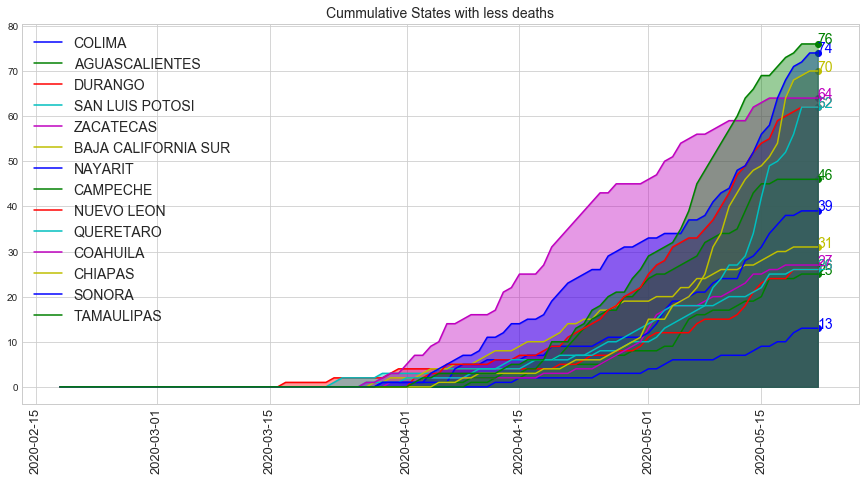

In [21]:
plot_max_to_min(raw_data = deaths,
                n=14,
                discrete=False,
                title='Cummulative States with less deaths',
                trim=0,
                reverse = True)

## Bar graph for all states min to max

### Deaths

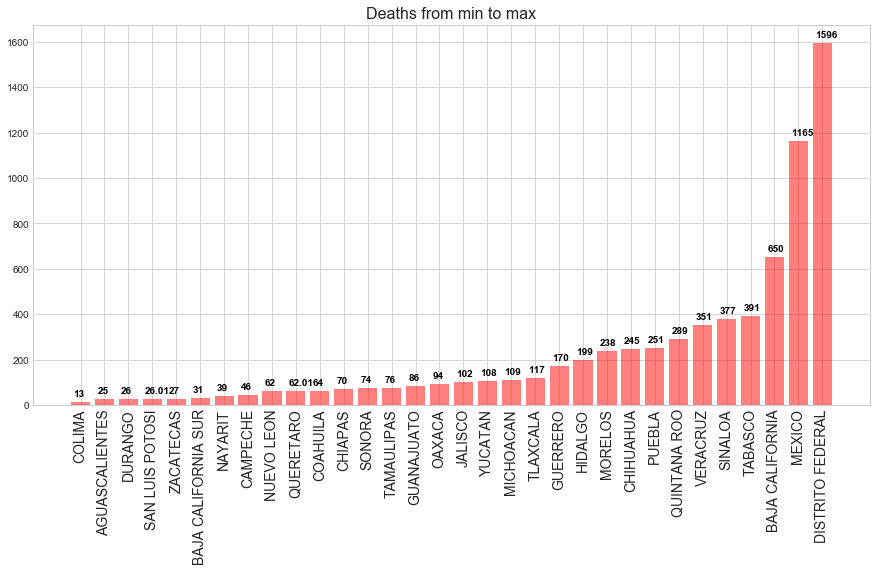

In [22]:
bar_data = get_max_to_min(deaths, include_national = False, reverse = True)

plt.bar(bar_data[0],[bar_data[1][x] for x in bar_data[0]], color='r',alpha=0.5)
plt.xticks(rotation=90,fontsize=14)
for i in range(len(bar_data[0])):
    value = bar_data[1][bar_data[0][i]]
    plt.text(i-0.3, value + 25, str(value), color='black', fontweight='bold')
plt.title('Deaths from min to max', fontsize=16)
plt.show()

### Confirmed

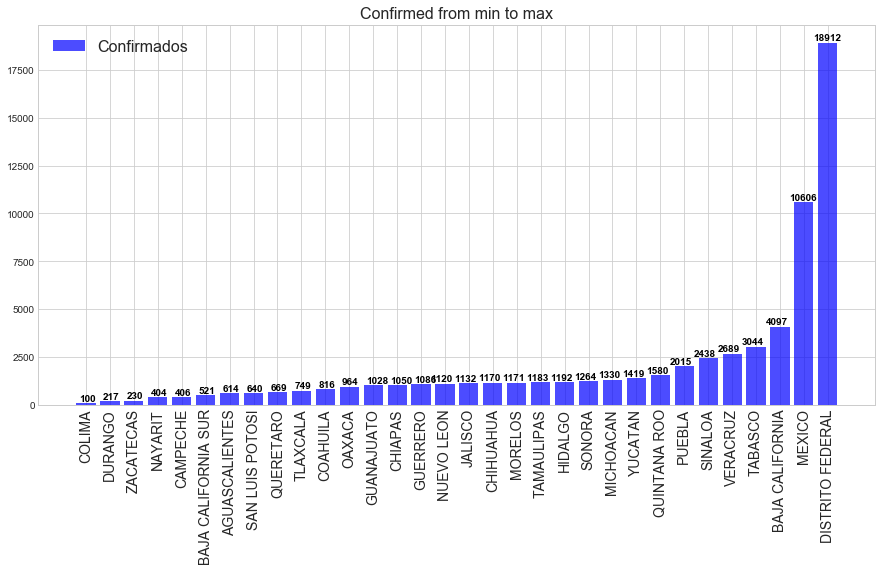

In [23]:
bar_data = get_max_to_min(confirmed, include_national = False, reverse = True)
plt.bar(bar_data[0],[bar_data[1][x] for x in bar_data[0]], color='b',alpha=0.7, label = 'Confirmados')
plt.xticks(rotation=90,fontsize=14)
for i in range(len(bar_data[0])):
    value = bar_data[1][bar_data[0][i]]
    if i < 15:
        plt.text(i-0.3, value + 100, str(value), color='black', fontweight='bold')
    else:
        plt.text(i-0.6, value + 100, str(value), color='black', fontweight='bold')

plt.title('Confirmed from min to max', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# 2.- Patients Data

### Cleaning the database

In [24]:
# Eliminate data from counties column, since it lacks one term an it's useless without it
patient_data = patient_data.drop('MUNICIPIO_RES',axis=1)

### Renaming columns to english

In [25]:
patient_data = patient_data.rename(columns={"FECHA_ACTUALIZACION":"Updated_at",
                                             "ID_REGISTRO": "id",
                                             "ORIGEN":"origin",
                                             "SECTOR":"sector",
                                             "ENTIDAD_UM": "treated_at",
                                             "SEXO": "sex",
                                             "ENTIDAD_NAC":"borne_at",
                                             "ENTIDAD_RES": "lives_at",
                                             "TIPO_PACIENTE": "pacient_type",
                                             "FECHA_INGRESO":"admission_date",
                                             "FECHA_SINTOMAS":"onset_symptoms",
                                             "FECHA_DEF": "day_of_death",
                                             "INTUBADO": "intubated",
                                             "NEUMONIA":"pneumonia",
                                             "EDAD":"age",
                                             "NACIONALIDAD":"is_mexican",
                                             "EMBARAZO":"pregnancy",
                                             "HABLA_LENGUA_INDIG":"speaks_dialect",
                                             "DIABETES":"diabetes",
                                             "EPOC": "copd",
                                             "ASMA":"asthma",
                                             "INMUSUPR":"immunosuppression",
                                             "HIPERTENSION":"hypertension",
                                             "OTRA_COM":"another_illness",
                                             "CARDIOVASCULAR":"cardiovascular",
                                             "OBESIDAD":"obesity",
                                             "RENAL_CRONICA":"kidney_disease",
                                             "TABAQUISMO":"smoker",
                                             "OTRO_CASO":"close_to_infected",
                                             "RESULTADO":"result",
                                             "MIGRANTE":"migrant",
                                             "PAIS_NACIONALIDAD":"nationality",
                                             "PAIS_ORIGEN": "country_of_origin",
                                             "UCI":"icu"})

### Data keys:

In [24]:
patient_data.keys()

Index(['Updated_at', 'id', 'origin', 'sector', 'treated_at', 'sex', 'borne_at',
       'lives_at', 'pacient_type', 'admission_date', 'onset_symptoms',
       'day_of_death', 'intubated', 'pneumonia', 'age', 'is_mexican',
       'pregnancy', 'speaks_dialect', 'diabetes', 'copd', 'asthma',
       'immunosuppression', 'hypertension', 'another_illness',
       'cardiovascular', 'obesity', 'kidney_disease', 'smoker',
       'close_to_infected', 'result', 'migrant', 'nationality',
       'country_of_origin', 'icu'],
      dtype='object')

### Data sample

In [25]:
patient_data.head()

,Updated_at,id,origin,sector,treated_at,sex,borne_at,lives_at,pacient_type,admission_date,...,cardiovascular,obesity,kidney_disease,smoker,close_to_infected,result,migrant,nationality,country_of_origin,icu
0,2020-05-22,19298e,2,4,9,2,9,9,1,2020-03-28,...,2,1,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-22,0900f9,2,4,9,2,9,9,1,2020-03-30,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-05-22,0315fc,2,4,15,1,15,15,1,2020-04-03,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-22,103147,2,4,14,1,14,14,2,2020-04-11,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-22,009395,2,4,25,1,25,25,1,2020-04-13,...,2,2,2,2,99,1,99,MÃ©xico,99,97


### Loading a function to translate the codes from the data

In [26]:
from data_helpers import patient_data_keys
# Some data is coded, for example from column:  patient_data['sector'],
# This function takes the column name and a key to decoded
# if the key == None, then outputs all the codes from the column

In [27]:
patient_data_keys('result',key=1)

'Positive for SARS-CoV-2'

In [28]:
patient_data_keys('sector',key=None)

KEYS for  SECTOR :
Key:  1  :  red cross
Key:  2  :  Integral Family Development System (DIF)
Key:  3  :  state
Key:  4  :  Mexican Institute for Social Security (IMSS)
Key:  5  :  IMSS-BIENESTAR
Key:  6  :  Institute for Social Security and Services for State Workers (ISSSTE)
Key:  7  :  county
Key:  8  :  Mexican Oil (PEMEX)
Key:  9  :  Private
Key:  10  :  National Secretary of Defense (SEDENA)
Key:  11  :  Secretary of Sea (SEMAR)
Key:  12  :  Secretary of Health (SSA)
Key:  13  :  University
Key:  99  :  no specified


# Exploring the database

### General subsets

In [29]:
men = patient_data[patient_data['sex']==2]
women = patient_data[patient_data['sex']==1]
alive = patient_data[patient_data['day_of_death']=='9999-99-99']
deceased = patient_data[patient_data['day_of_death']!='9999-99-99']
deceased = deceased[deceased['result']==1]
men_deceased = deceased[deceased['sex']==2]
women_deceased =  deceased[deceased['sex']==1]

## Which sector do they came from:

## Two biggest sectors:

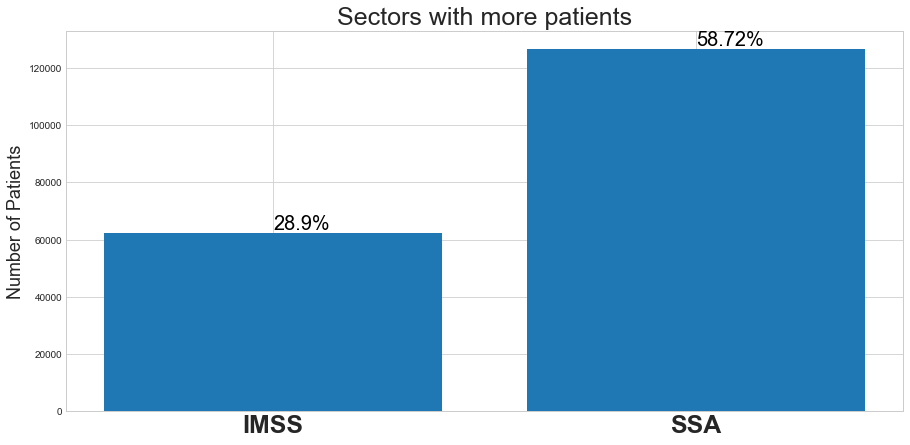

In [326]:
sector_bins = {key:0 for key in set(patient_data['sector'])}

for sector in patient_data['sector']:
        sector_bins[sector]+=1

plt.bar(['IMSS','SSA'],[sector_bins[4],sector_bins[12]])
plt.text('IMSS', sector_bins[4] + 1000, str(round((sector_bins[4]/len(patient_data)*100),2))+'%', color='black',fontsize=20)
plt.text('SSA', sector_bins[12] + 1000, str(round((sector_bins[12]/len(patient_data)*100),2))+'%', color='black',fontsize=20)

plt.title('Sectors with more patients',fontsize=25)
plt.ylabel('Number of Patients', fontsize=18)
plt.xticks(fontsize=25, fontweight='bold')
plt.show();

## Rest of the sectors

In [328]:
del sector_bins[4]
del sector_bins[12]
del sector_bins[99]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

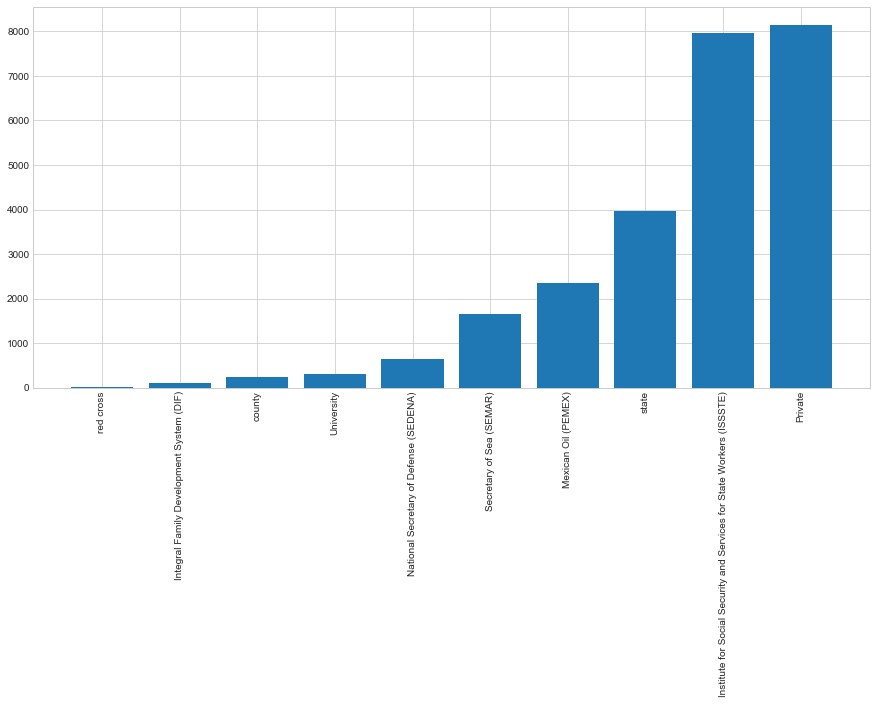

In [337]:
sort_dict = {}
for key in sector_bins.keys():
    if sector_bins[key] in sort_dict.keys():
        sort_dict[sector_bins[key]+0.01] = key
    else:
        sort_dict[sector_bins[key]] = key
sort_keys = sorted(sort_dict.keys(),reverse = False)

result_dic = {sort_dict[key]: key for key in sort_keys}
plt.bar([ patient_data_keys('sector',x) for x in list(result_dic.keys())],list(result_dic.values()))
plt.xticks(rotation=90)

## deaths From sector

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

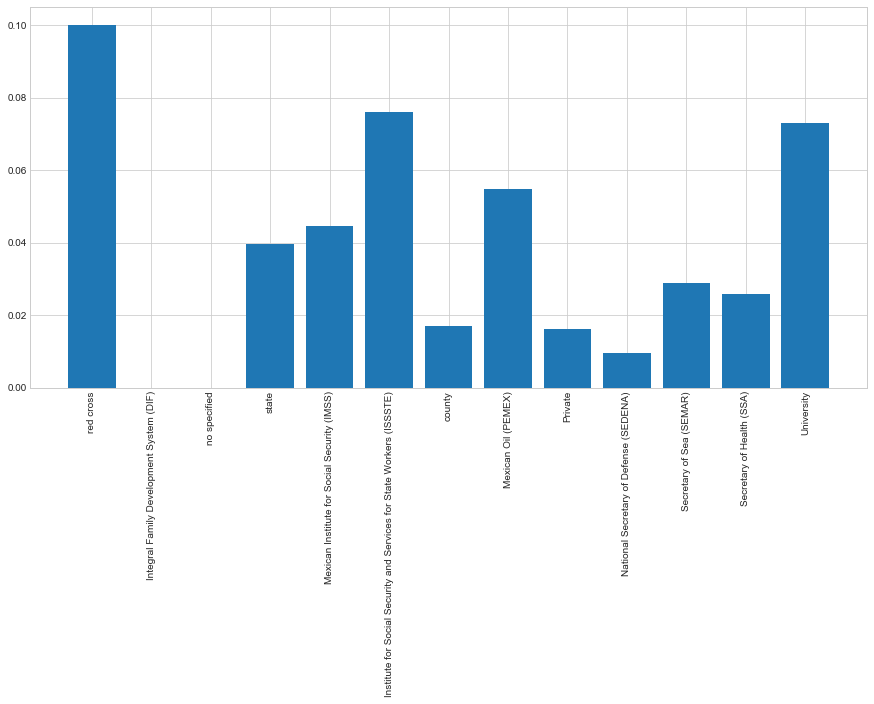

In [327]:
dead_bins = {key:0 for key in set(patient_data['sector']) if key != 99}

for i in deceased['sector']:
    if i !=99:
        dead_bins[i]+=1


prop = {key:0 for key in set(patient_data['sector'])}
for i in dead_bins.keys():
    prop[i]= dead_bins[i]/sector_bins[i]

plt.bar([patient_data_keys('sector',x) for x in list(prop.keys())],list(prop.values()))
plt.xticks(rotation=90)

## Active Infections

In [30]:
from data_helpers import get_cummulative_actives
# This function gets a cummulative record for infected patients using a defaul window of 14 days for infection:
# get_cummulative_actives(patient_data,'state name',window = 14)

## State Infections by any particular day

In [33]:
# First get the cummulative data for state actives
some_data = get_cummulative_actives(women_deceased,'National',14)

In [34]:
# And locate the particular date ('aaaa-mm-dd'):
some_data.loc['2020-05-21']

actives    289
Name: 2020-05-21 00:00:00, dtype: int32

### Plotting Active infections

In [35]:
def plt_actives(data,names,trim=0):
    plt.rcParams["figure.figsize"] = (15,7)
    
    first_day = min([min(x.index) for x in data])
    last_day = max([max(x.index) for x in data])
    
    new_index = pd.date_range(start=first_day, end=last_day)
    
    for ind, dataframe in enumerate(data):
        if len(dataframe) != len(new_index):
            plt.plot([str(x)[5:11] for x in new_index],[0]*(len(new_index)-len(dataframe))+list(dataframe['actives']),label=names[ind])
        else:
            plt.plot([str(x)[5:11] for x in new_index],dataframe['actives'],label=names[ind])
    
    plt.xticks(rotation=90, fontsize=12)
    plt.xlim(trim,)
    plt.legend(fontsize=14)
    plt.show();
    

## National Actives

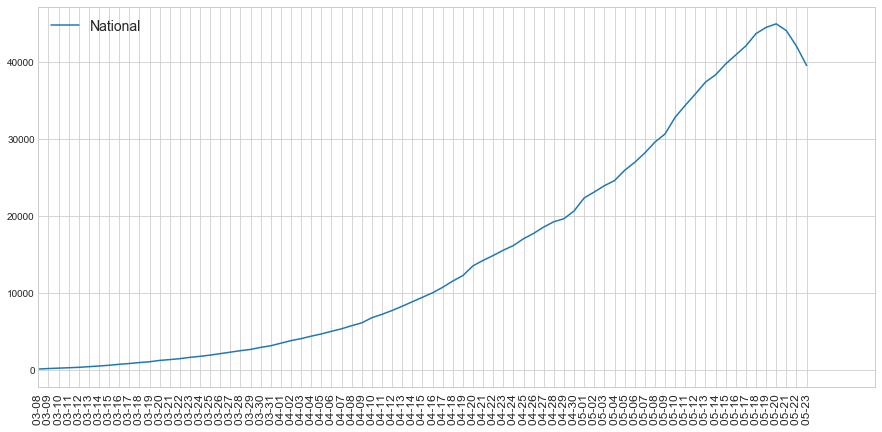

In [36]:
plt_actives([state_data],['National'],trim=60)

## States max to min Active infections 

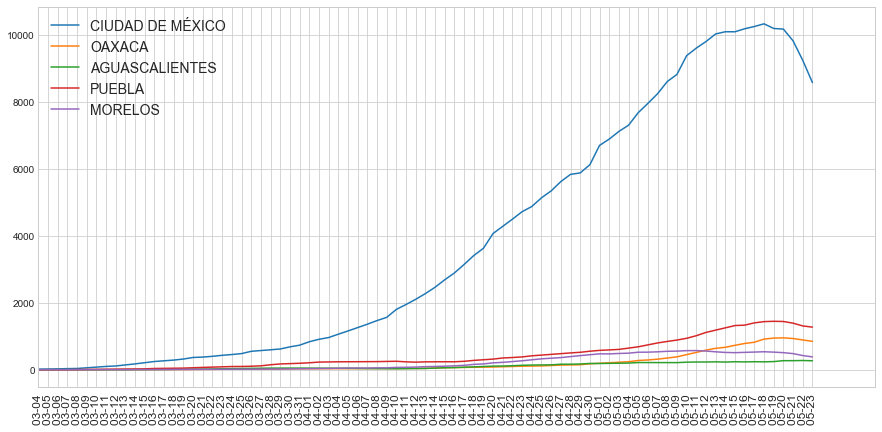

In [37]:
mexico_oaxaca = [get_cummulative_actives(patient_data, x, 14) for x in ['CIUDAD DE MÉXICO','OAXACA','AGUASCALIENTES','PUEBLA','MORELOS']]
plt_actives(mexico_oaxaca,['CIUDAD DE MÉXICO','OAXACA','AGUASCALIENTES','PUEBLA','MORELOS'],trim=50)

## States min to max Active infections 

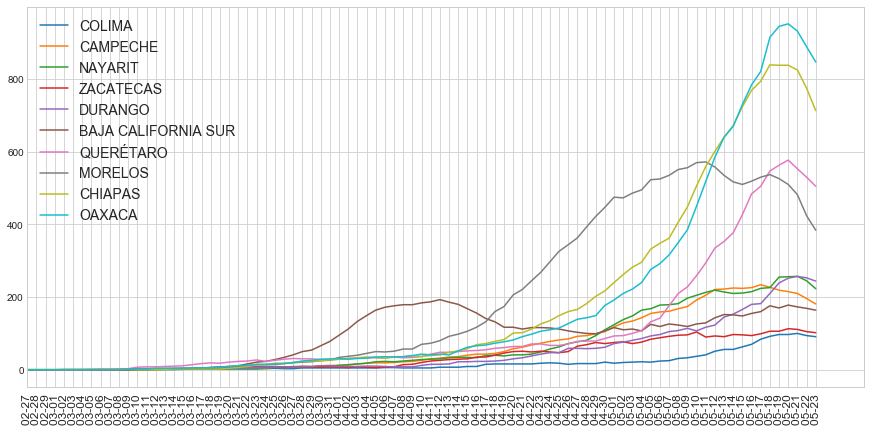

In [39]:
min_max_states = get_max_to_min(patient_data, include_national = False, reverse = True, patient_data = True)[0][:10]
plot_max_min = [get_cummulative_actives(patient_data, x, 14) for x in min_max_states]

plt_actives(plot_max_min ,min_max_states, trim=20)

## Age and Sex descriptions

### Men vs Women active

In [40]:
men_active = get_cummulative_actives(men,'National',14)
women_active = get_cummulative_actives(women,'National',14)

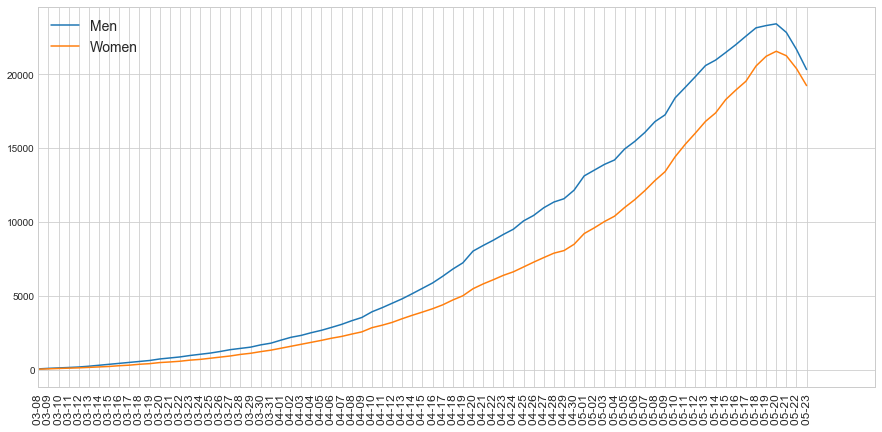

In [41]:
plt_actives([men_active,women_active] ,['Men','Women'], trim=60)

### Plotting Age for general population

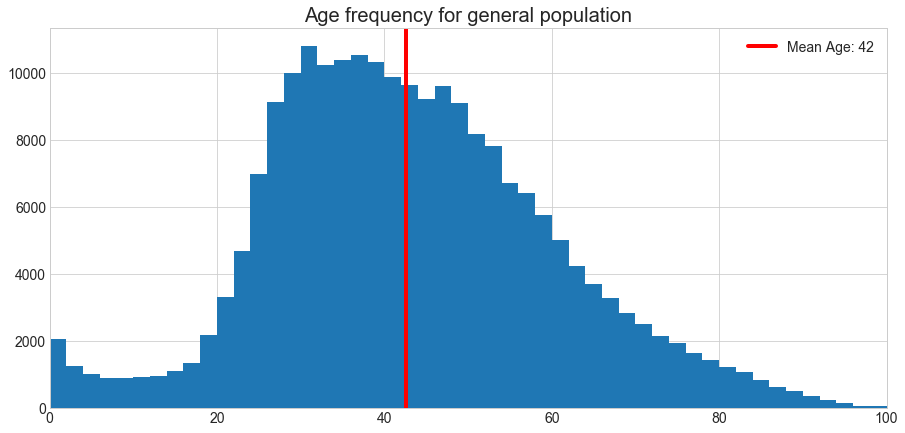

In [42]:
patient_data['age'].hist(bins=60)
plt.axvline(x=patient_data['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(patient_data["age"].mean())}')
plt.title('Age frequency for general population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Men and Women Proportion

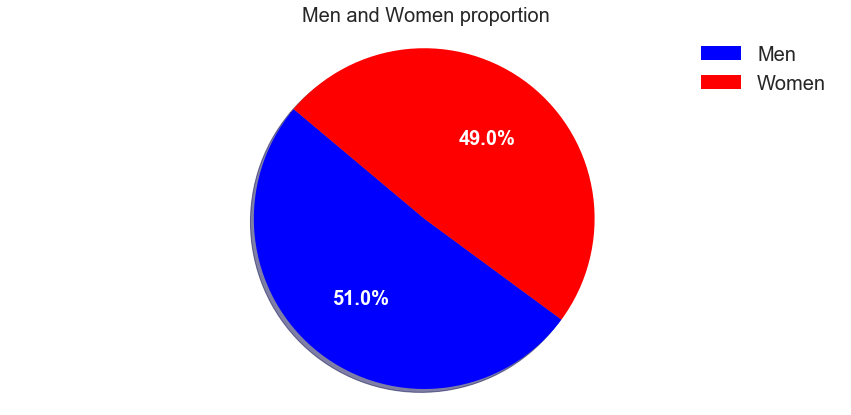

In [43]:
plt.close('all')
labels = 'Men', 'Women'
sizes = [len(men),len(women)]
colors = ['b', 'r']

plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 20,'color':'white','weight':'bold'},
       shadow=True)

plt.title(f'Men and Women proportion',fontsize=20)
plt.legend(fontsize=20)
plt.axis('equal')
plt.show();

### Plotting Man and Women Age frequency

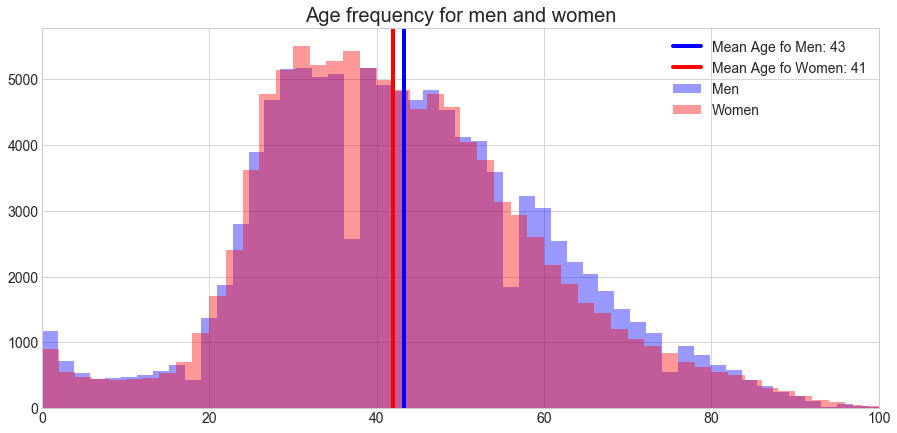

In [44]:
men.age.hist(bins=60,alpha=0.4,label='Men',color='b')
plt.axvline(x=men.age.mean(),linewidth=4, color='b',label=f'Mean Age fo Men: {int(men["age"].mean())}')
women.age.hist(bins=60,alpha=0.4,label='Women',color='r')
plt.axvline(x=women.age.mean(),linewidth=4, color='r',label=f'Mean Age fo Women: {int(women["age"].mean())}')

plt.title('Age frequency for men and women',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Deceased Age frequency

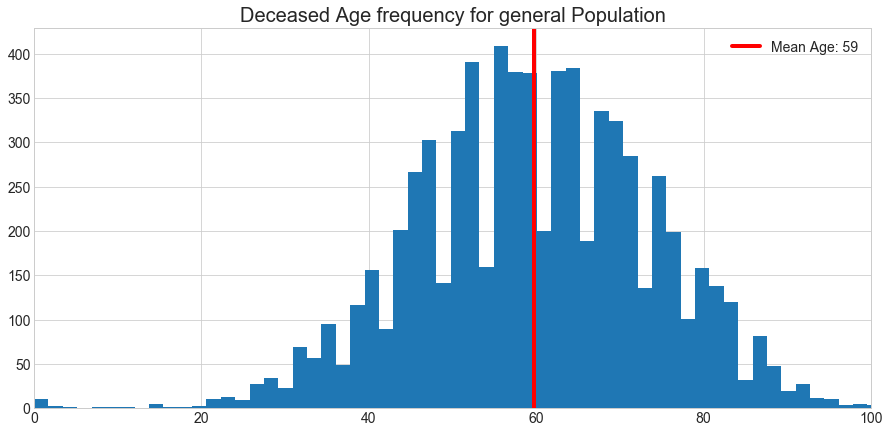

In [45]:
plt.close('all')
deceased['age'].hist(bins=60)
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(deceased["age"].mean())}')

plt.title('Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Alive vs Deceased Age frequency

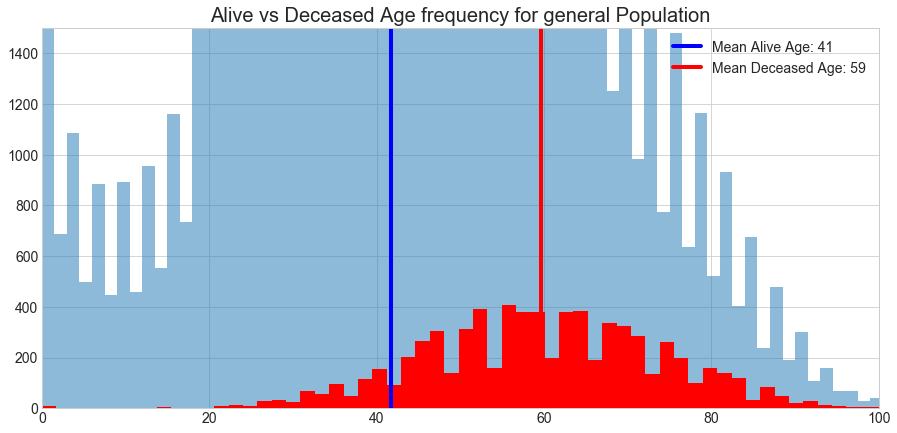

In [46]:
plt.close('all')

alive['age'].hist(bins=80,alpha=0.5)
plt.axvline(x=alive['age'].mean(),linewidth=4, color='b',label=f'Mean Alive Age: {int(alive["age"].mean())}')

deceased['age'].hist(bins=60,color='r')
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Deceased Age: {int(deceased["age"].mean())}')

plt.title('Alive vs Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,1500)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Woman vs Men Decease Age

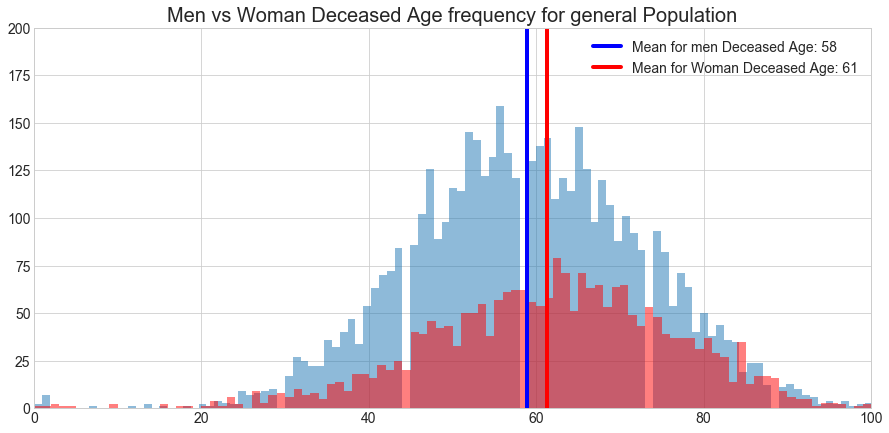

In [47]:
plt.close('all')

men_deceased['age'].hist(bins=110,alpha=0.5)
plt.axvline(x=men_deceased['age'].mean(),linewidth=4, color='b',label=f'Mean for men Deceased Age: {int(men_deceased["age"].mean())}')

women_deceased['age'].hist(bins=100,color='r',alpha=0.5)
plt.axvline(x=women_deceased['age'].mean(),linewidth=4, color='r',label=f'Mean for Woman Deceased Age: {int(women_deceased["age"].mean())}')

plt.title('Men vs Woman Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,200)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Probaility Density for women and men decease

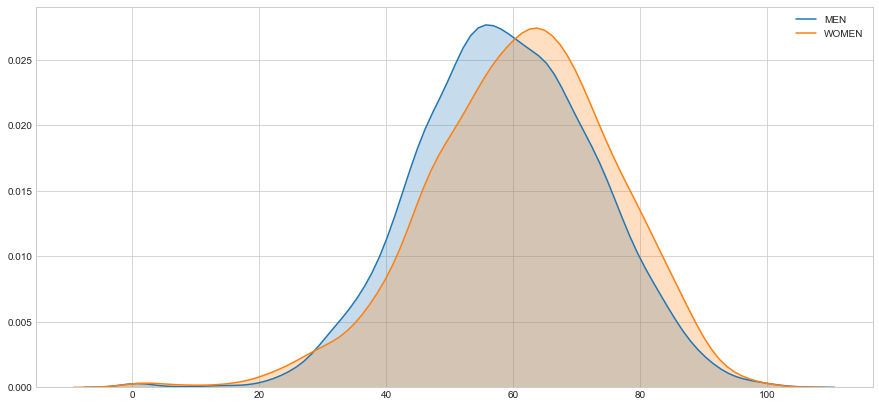

In [48]:
plt.close('all')
sns.kdeplot(men_deceased['age'], label='MEN',shade = True)
sns.kdeplot(women_deceased['age'],label = 'WOMEN',shade= True)
plt.show()

### Checking if there are significative differences between the two samples

In [49]:
# T test for independen samples, to see if the two distributions are the same
from scipy.stats import ttest_ind
# Implements Cohens Difference to see how far away are the two samples
from data_helpers import cohens_d

_, pv = ttest_ind(men_deceased['age'], women_deceased['age'])

if pv < 0.01:
    print(f'The two samples are distinct, alpha = {pv}')
else:
    print('There is not difference between samples')

difference_between_samples = round(cohens_d(men_deceased['age'], women_deceased['age']),2)

print(f'Men are {difference_between_samples} stds away from Women')


The two samples are distinct, alpha = 3.8290024325813575e-11
Men are -0.17 stds away from Women


## Proportion of deaths by age filtered by sex

### Getting the Histogram data

In [50]:
# This function takes an array of ages and outputs a dictionary for plotting an histogram:
# get_age_bins(data,bin_size)
from data_helpers import get_age_bins

ages_freq_dead_men = get_age_bins(men_deceased, bin_size = 5)
ages_freq_dead_women = get_age_bins(women_deceased, bin_size = 5)
age_freq_men = get_age_bins(men, bin_size = 5)
age_freq_women = get_age_bins(women, bin_size = 5)

### Calculating the proportions

In [51]:
# This function takes the histogram for general population and the filtered one,
# returns an histogram with proportion of the filtered data in relation to the general population
# get_proportions(filtered_histogram, general_patients_histogram)
from data_helpers import get_proportions

death_proportions_men = get_proportions(ages_freq_dead_men, age_freq_men)
death_proportions_women = get_proportions(ages_freq_dead_women, age_freq_women)

## Plotting proportion of deaths by age (men and women)

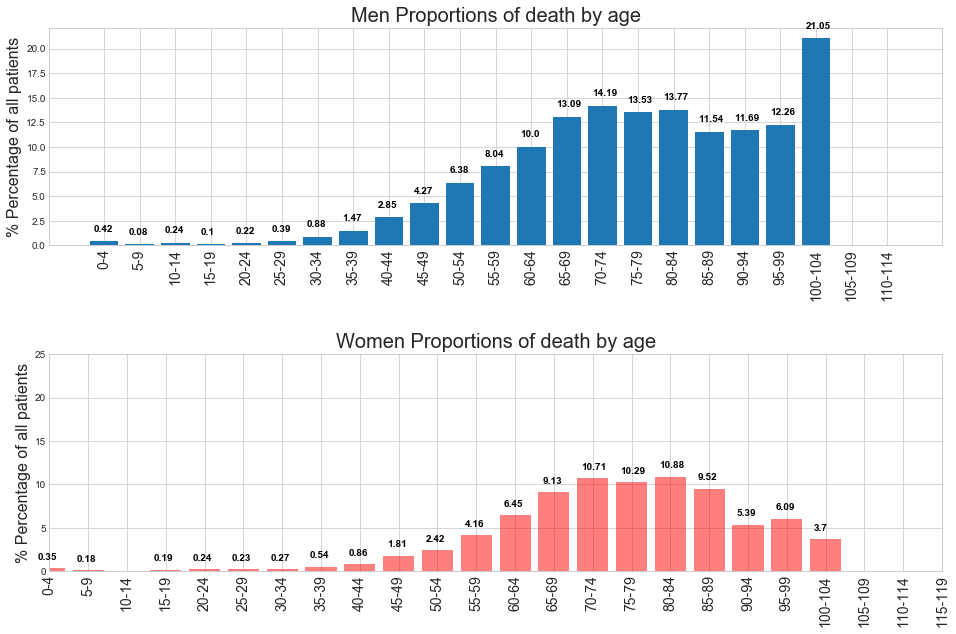

In [52]:
plt.close('all')
fig, axs = plt.subplots(2,figsize=(16,10))
plt.subplots_adjust(hspace=0.5) 

axs[0].bar(list(death_proportions_men.keys()),list(death_proportions_men.values()))
axs[0].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[0].set_title('Men Proportions of death by age',fontsize=20)
for i in range(23):
    value = round(list(death_proportions_men.values())[i],2)
    if value == 0:
        continue
    else:
        axs[0].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

axs[1].bar(list(death_proportions_women.keys()),list(death_proportions_women.values()),color='r',alpha=0.5)
axs[1].set_ylim(0,25)
axs[1].set_title('Women Proportions of death by age',fontsize=20)
axs[1].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[1].set_xlim(0,23)
for i in range(23):
    value = round(list(death_proportions_women.values())[i],2)
    if value == 0:
        continue
    else:
        axs[1].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize=14)
plt.show()

## Exploring the frequency of Ilness in deceased vs alive patients

### Generating subsets of data

In [261]:
deceased_illness = deceased[['pneumonia','diabetes', 'copd', 'asthma','intubated',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
alive_illness = alive[['pneumonia','diabetes', 'copd', 'asthma','intubated',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
man_deceased_illness   = deceased_illness[deceased_illness['sex']==1]
woman_deceased_illness = deceased_illness[deceased_illness['sex']==2]
alive_man_illness      = alive_illness[alive_illness['sex']==1]
alive_woman_illness    = alive_illness[alive_illness['sex']==2]

man_deceased_illness   = man_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
woman_deceased_illness = woman_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_man_illness      = alive_man_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_woman_illness    = alive_woman_illness.drop('sex',axis = 1).replace([97,98,99],2)
deceased_illness = deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_illness = alive_illness.drop('sex',axis = 1).replace([97,98,99],2)



## Younger dead patients

In [256]:
younger_40 = patient_data[patient_data['result']==1]

In [257]:
younger_40 = patient_data[patient_data['day_of_death']!='9999-99-99']

In [264]:
younger_40 = younger_40[['pneumonia','diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]

In [ ]:
younger_40

In [243]:
patient_data_keys('result')

KEYS for  RESULT :
Key:  1  :  Positive for SARS-CoV-2
Key:  2  :  Negative for SARS-CoV-2
Key:  3  :  Result Pending


### Man Proportions of Ilness, deceased vs Alive

In [55]:
from data_helpers import get_illness_proportions

In [259]:
mdp = get_illness_proportions(man_deceased_illness)
wdp = get_illness_proportions(woman_deceased_illness)
malp = get_illness_proportions(alive_man_illness)
walp = get_illness_proportions(alive_woman_illness)
younger = get_illness_proportions(younger_40)

## Man alive vs dead illness proportion

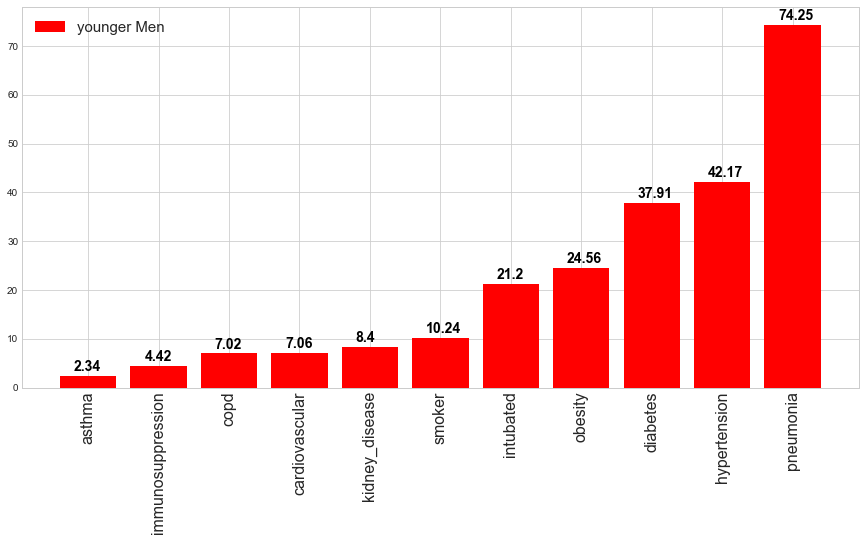

In [265]:
plt.close('all')
plt.bar(list(younger.keys()),list(younger.values()), label = 'younger Men', color ='r')

for ind, i in enumerate(younger.keys()):
    plt.text(ind-0.2, younger[i] + 1, str(round(younger[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

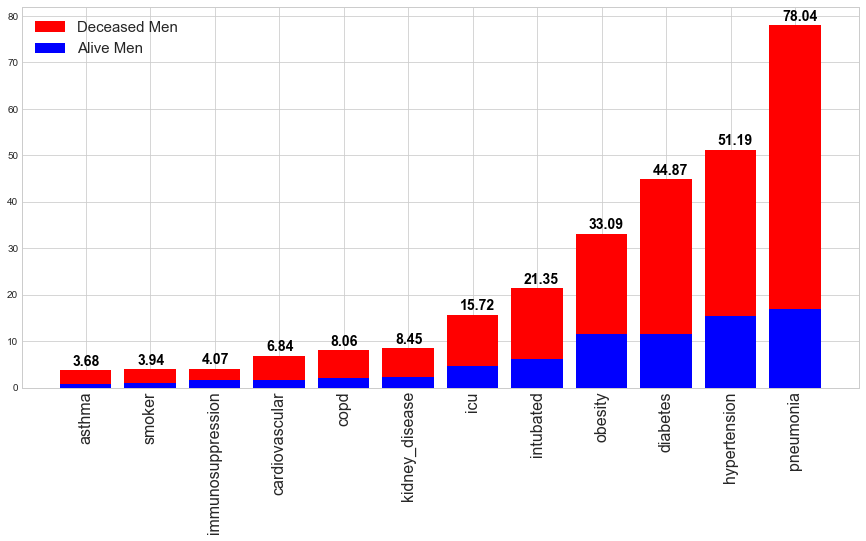

In [57]:
plt.close('all')
plt.bar(list(mdp.keys()),list(mdp.values()), label = 'Deceased Men', color ='r')
plt.bar(list(mdp.keys()),list(malp.values()), label = 'Alive Men', color ='b')


for ind, i in enumerate(mdp.keys()):
    plt.text(ind-0.2, mdp[i] + 1, str(round(mdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

## Women alive vs dead illness proportion

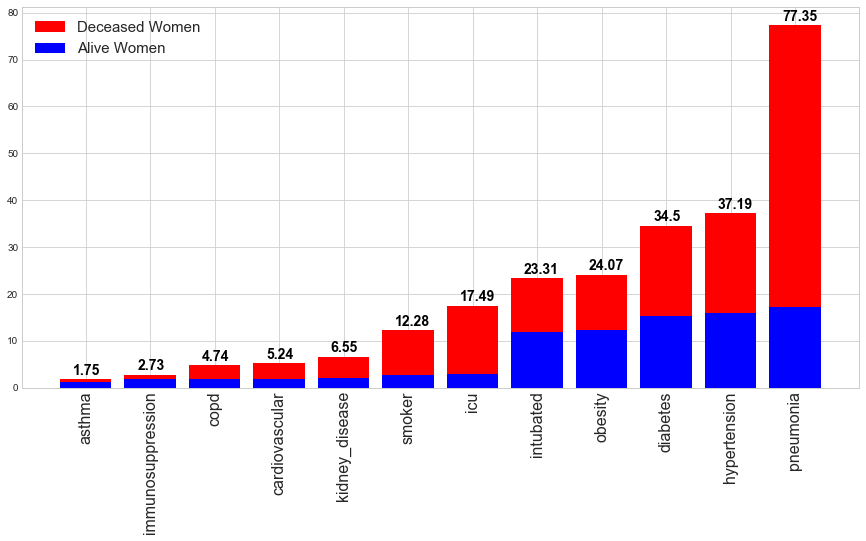

In [58]:
plt.close('all')
plt.bar(list(wdp.keys()),list(wdp.values()), label = 'Deceased Women', color ='r')
plt.bar(list(wdp.keys()),list(walp.values()), label = 'Alive Women', color ='b')


for ind, i in enumerate(wdp.keys()):
    plt.text(ind-0.2, wdp[i] + 1, str(round(wdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [55]:
stoping the flow so the next does not run

SyntaxError: invalid syntax (<ipython-input-55-85260621167d>, line 1)

In [149]:
patient_data_keys('sex')

KEYS for  SEX :
Key:  1  :  women
Key:  2  :  man
Key:  99  :  no specified


In [218]:
deceased_illness = deceased[['diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]
alive_illness = alive[['diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]

deceased_illness = deceased_illness.replace(2,0)
alive_illness = alive_illness.replace(2,0)

y_deceased = np.ones(len(deceased_illness))
y_alive = np.zeros(len(alive_illness))

deceased_illness['result'] = y_deceased

alive_illness['result'] = y_alive

all_data = pd.concat([deceased_illness,alive_illness])

y = all_data['result']

all_data = all_data.drop('result',axis=1)


In [219]:
all_data

,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,kidney_disease,smoker
4,1,0,0,0,1,1,0,0,0
5,0,0,0,0,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,1,0,0
23,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
215650,0,0,0,0,0,0,1,0,0
215651,0,0,0,0,1,0,0,0,0
215652,0,0,0,0,1,0,0,0,0
215654,0,0,0,0,0,0,0,0,1


In [220]:
all_data

,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,kidney_disease,smoker
4,1,0,0,0,1,1,0,0,0
5,0,0,0,0,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,1,0,0
23,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
215650,0,0,0,0,0,0,1,0,0
215651,0,0,0,0,1,0,0,0,0
215652,0,0,0,0,1,0,0,0,0
215654,0,0,0,0,0,0,0,0,1


# Selecting Feature importance

In [221]:
X = all_data
y = y

In [222]:
from sklearn.model_selection import train_test_split 

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_digits, make_regression, make_classification
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance

### SVC

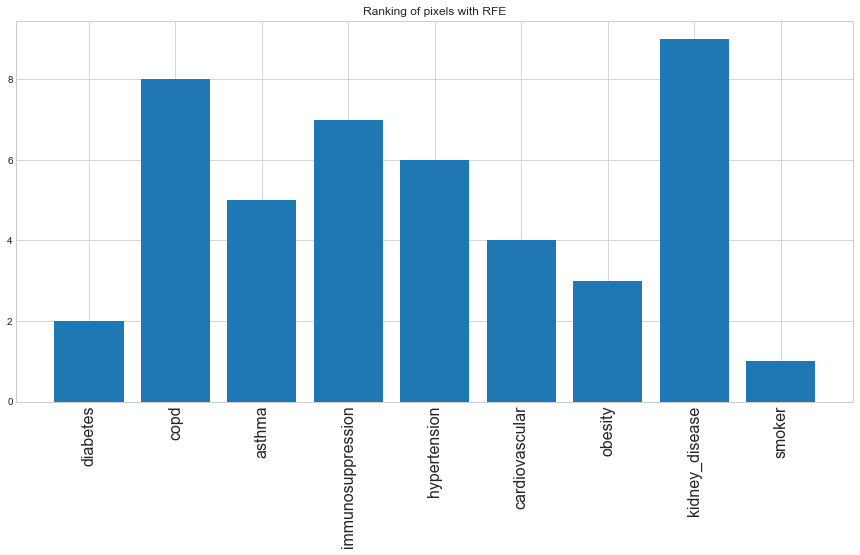

In [231]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
# Plot pixel ranking
plt.bar(range(0,len(rfe.ranking_)),rfe.ranking_)
plt.title("Ranking of pixels with RFE")
plt.xticks(range(0,len(rfe.ranking_)),all_data.keys(),rotation=90, fontsize=16)
plt.show()

In [113]:
X.keys()

Index(['pneumonia', 'diabetes', 'copd', 'asthma', 'intubated',
       'immunosuppression', 'hypertension', 'cardiovascular', 'obesity',
       'kidney_disease', 'smoker', 'icu'],
      dtype='object')

## Linear Regression

Feature: 0, Score: 0.00062
Feature: 1, Score: 0.00010
Feature: 2, Score: -0.00062
Feature: 3, Score: -0.00056
Feature: 4, Score: 0.00020
Feature: 5, Score: 0.00052
Feature: 6, Score: 0.00181
Feature: 7, Score: -0.00039
Feature: 8, Score: -0.00077


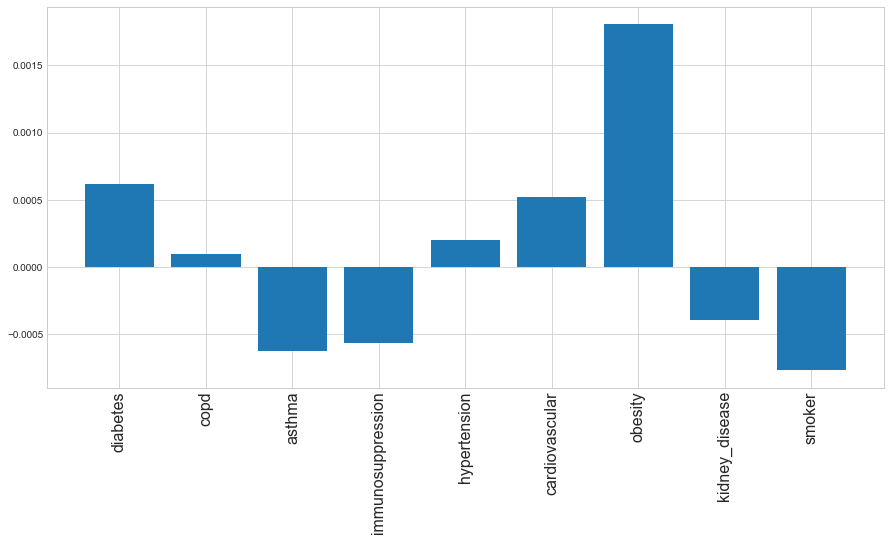

In [232]:
LinReg_model = LinearRegression()
# fit the model
LinReg_model.fit(X_train, y_train)
# get importance
importance = LinReg_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],all_data.keys(),rotation=90, fontsize=16)
plt.show()

## Logistic Regression

Feature: 0, Score: 0.01017
Feature: 1, Score: 0.00302
Feature: 2, Score: -0.00877
Feature: 3, Score: -0.01404
Feature: 4, Score: 0.00471
Feature: 5, Score: 0.00970
Feature: 6, Score: 0.02310
Feature: 7, Score: -0.00346
Feature: 8, Score: -0.01160


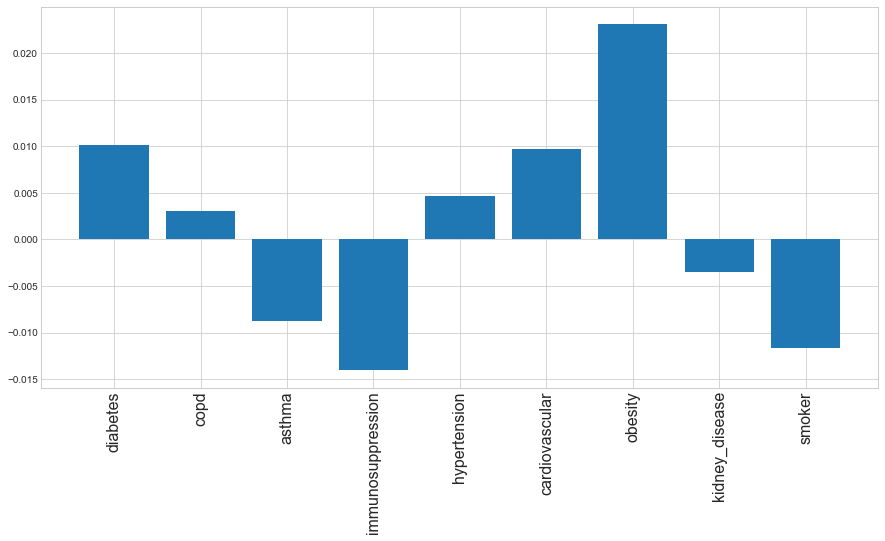

In [233]:
LogReg_model = LogisticRegression()
# fit the model
LogReg_model.fit(X_train, y_train)
# get importance
importance = LogReg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## Descicion Tree

Feature: 0, Score: 0.48318
Feature: 1, Score: 0.04290
Feature: 2, Score: 0.03771
Feature: 3, Score: 0.04034
Feature: 4, Score: 0.15131
Feature: 5, Score: 0.05224
Feature: 6, Score: 0.10613
Feature: 7, Score: 0.03881
Feature: 8, Score: 0.04737


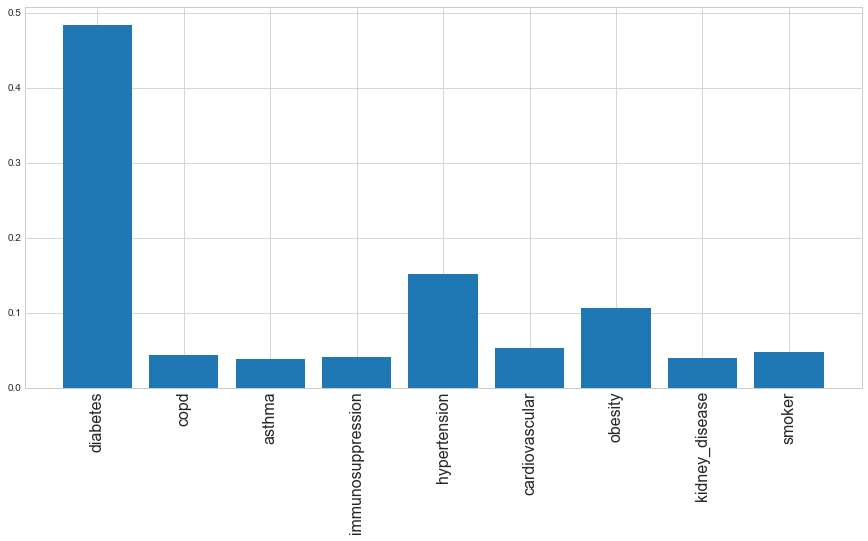

In [234]:
DesTree_model = DecisionTreeRegressor()
# fit the model
DesTree_model.fit(X_train, y_train)
# get importance
importance = DesTree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [96]:
X.keys()

Index(['pneumonia', 'diabetes', 'copd', 'asthma', 'intubated',
       'immunosuppression', 'hypertension', 'cardiovascular', 'obesity',
       'kidney_disease', 'smoker', 'icu'],
      dtype='object')

Feature: 0, Score: 0.48299
Feature: 1, Score: 0.04558
Feature: 2, Score: 0.03309
Feature: 3, Score: 0.03999
Feature: 4, Score: 0.14848
Feature: 5, Score: 0.05003
Feature: 6, Score: 0.11151
Feature: 7, Score: 0.03893
Feature: 8, Score: 0.04941


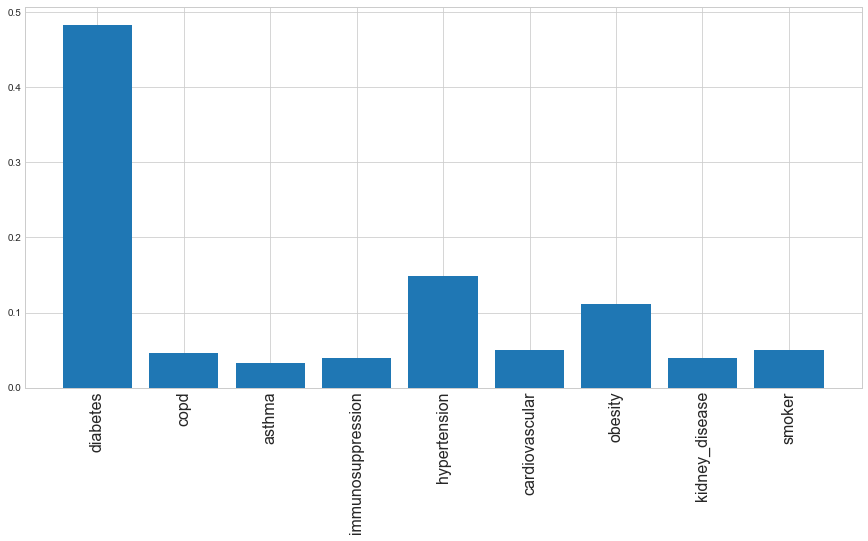

In [235]:
# define the model
DesTreeClass_model = DecisionTreeClassifier()
# fit the model
DesTreeClass_model.fit(X_train, y_train)
# get importance
importance = DesTreeClass_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## RandomForest

Feature: 0, Score: 0.44356
Feature: 1, Score: 0.05026
Feature: 2, Score: 0.04149
Feature: 3, Score: 0.04856
Feature: 4, Score: 0.14465
Feature: 5, Score: 0.05789
Feature: 6, Score: 0.10915
Feature: 7, Score: 0.04411
Feature: 8, Score: 0.06032


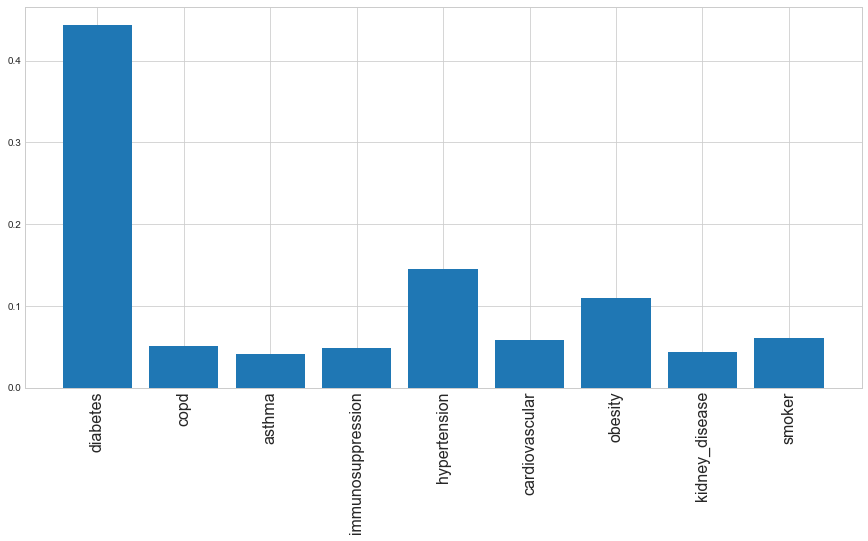

In [236]:
RanFoRe_model = RandomForestRegressor()
# fit the model
RanFoRe_model.fit(X_train, y_train)
# get importance
importance = RanFoRe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [123]:
X.keys()

Index(['pneumonia', 'diabetes', 'copd', 'asthma', 'immunosuppression',
       'hypertension', 'cardiovascular', 'obesity', 'kidney_disease',
       'smoker'],
      dtype='object')

Feature: 0, Score: 0.33479
Feature: 1, Score: 0.06756
Feature: 2, Score: 0.04020
Feature: 3, Score: 0.04542
Feature: 4, Score: 0.22392
Feature: 5, Score: 0.05507
Feature: 6, Score: 0.11199
Feature: 7, Score: 0.06957
Feature: 8, Score: 0.05149


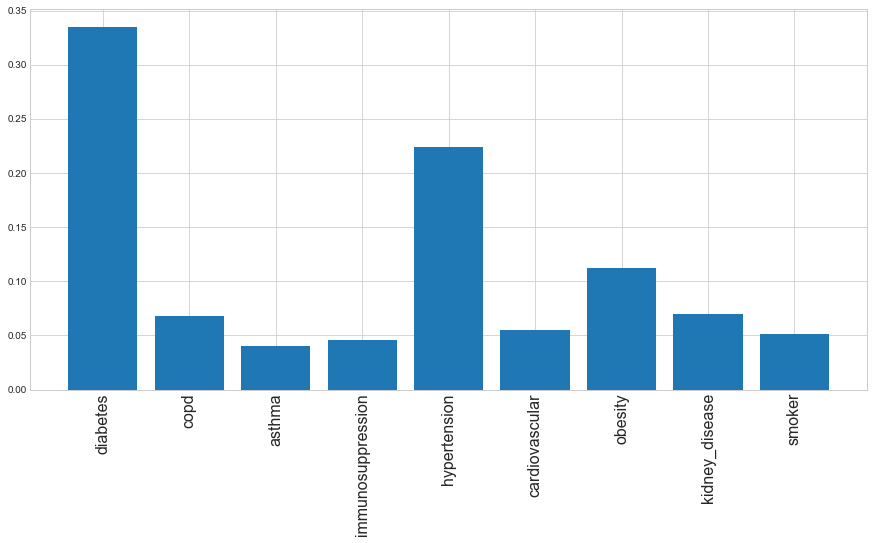

In [237]:
RFoClas_model = RandomForestClassifier()
# fit the model
RFoClas_model.fit(X_train, y_train)
# get importance
importance = RFoClas_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## XGBRegressor

[14:48:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.70259
Feature: 1, Score: 0.03443
Feature: 2, Score: 0.01375
Feature: 3, Score: 0.00587
Feature: 4, Score: 0.13519
Feature: 5, Score: 0.01826
Feature: 6, Score: 0.04846
Feature: 7, Score: 0.02619
Feature: 8, Score: 0.01527


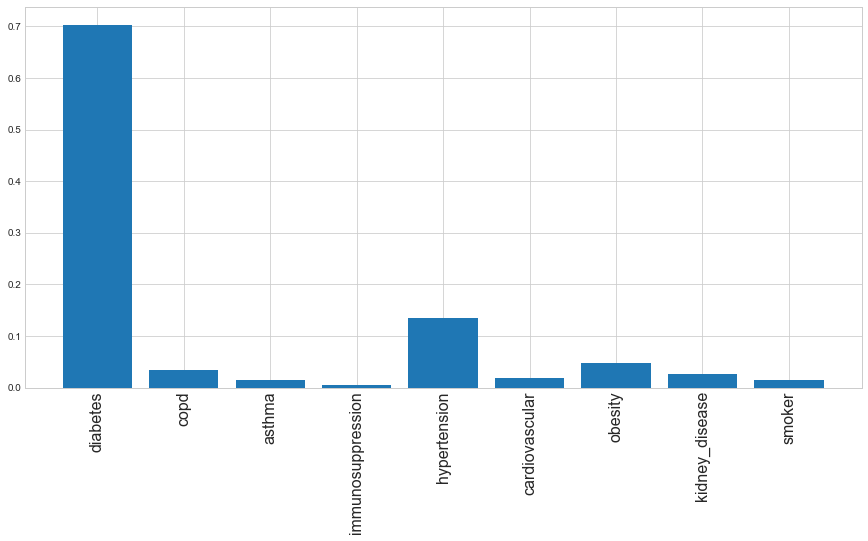

In [238]:
XGBRe_model = XGBRegressor()
# fit the model
XGBRe_model.fit(X_train, y_train)
# get importance
importance = XGBRe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

Feature: 0, Score: 0.57808
Feature: 1, Score: 0.05906
Feature: 2, Score: 0.01910
Feature: 3, Score: 0.01465
Feature: 4, Score: 0.18786
Feature: 5, Score: 0.02824
Feature: 6, Score: 0.06962
Feature: 7, Score: 0.03338
Feature: 8, Score: 0.01001


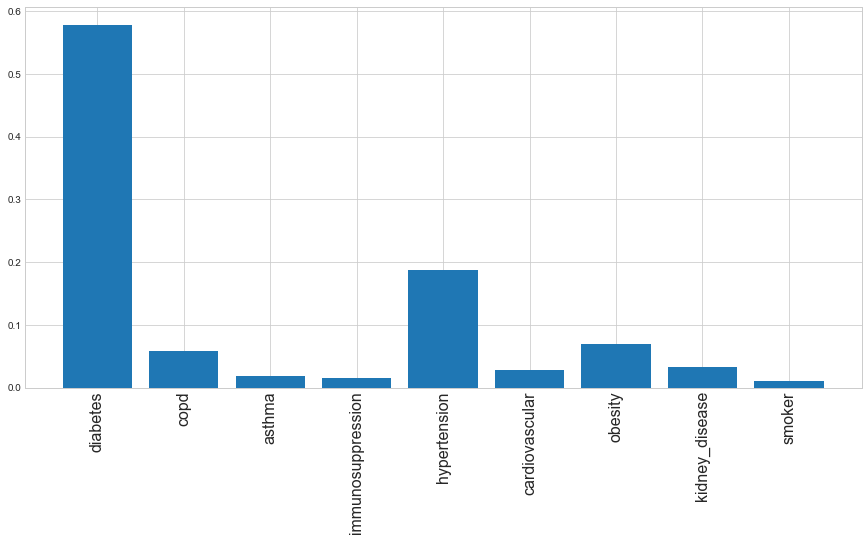

In [239]:
XGBclass_model = XGBClassifier()
# fit the model
XGBclass_model.fit(X_train, y_train)
# get importance
importance = XGBclass_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

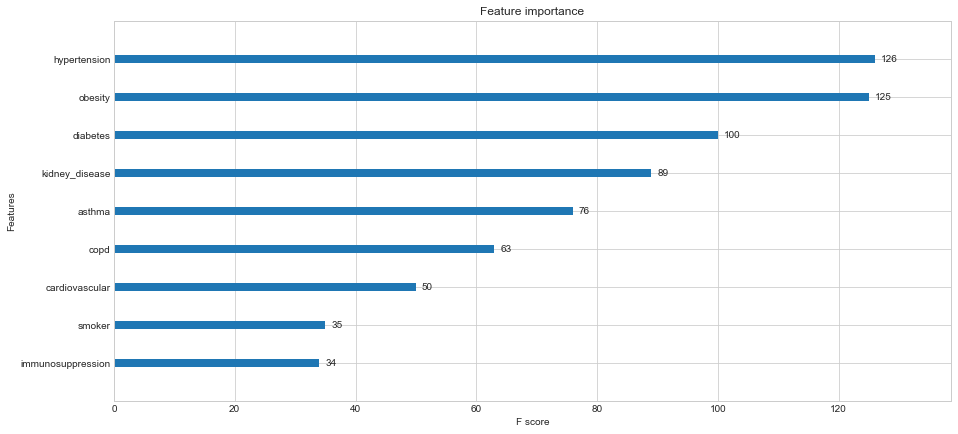

In [241]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

## K Neighbord Regressor

In [102]:
KNeiRe_model = KNeighborsRegressor()
# fit the model
KNeiRe_model.fit(X, y)


KeyboardInterrupt: 

In [ ]:
# perform permutation importance
results = permutation_importance(KNeiRe_model, X, y, scoring='neg_mean_squared_error')


In [ ]:
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
KNClas_model = KNeighborsClassifier()
# fit the model
KNClas_model.fit(X, y)
# perform permutation importance
results = permutation_importance(KNClas_model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

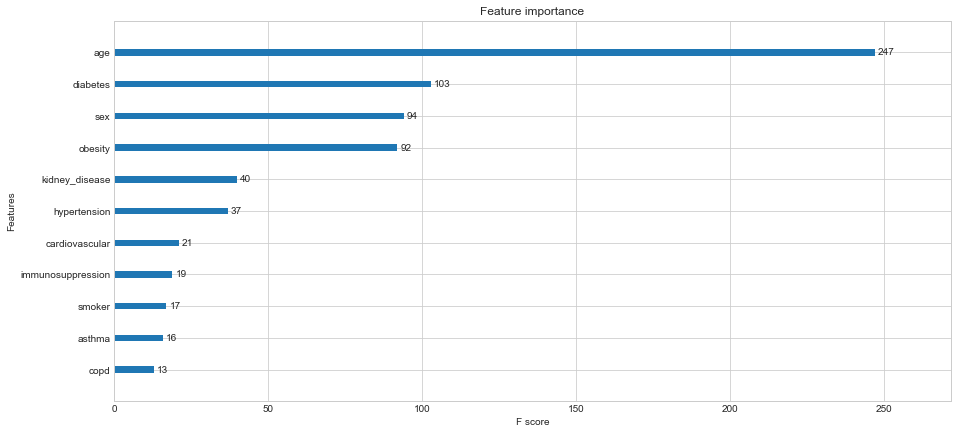

## https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

## and make the ages a bins of one hot

## and close this already!!!!